In [150]:
%run Libraries.ipynb

In [154]:
train_original=pd.read_csv("train.csv")
train=train_original.copy()
test_original=pd.read_csv("test.csv")
test=test_original.copy()

In [155]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
train.head(1) # there are a lot of columns that have srings ( and dictionaries within them). Wil have to think how to fix them

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [156]:
train['belongs_to_collection'][0] # this is a string

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [157]:
train.shape, test.shape

((3000, 23), (4398, 22))

In [158]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [159]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [160]:
def text_to_dic(df,columns):
    for column in columns:
        df[column]=df[column].apply(lambda x:{} if pd.isnull(x) else ast.literal_eval(x))
    return df

In [161]:
train=text_to_dic(train,dict_columns)
test=text_to_dic(test,dict_columns)

In [162]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


### belongs_to_collection

In [64]:
for i, value in enumerate(train[dict_columns[0]][0:4]):
    print(i,value)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}


In [65]:
#to get the Collection name
train[dict_columns[0]][0][0]['name']

'Hot Tub Time Machine Collection'

In [66]:
train['collection_name']=train['belongs_to_collection'].apply(lambda x:x[0]['name'] if x!={} else 0)
train['has_collection_name']=train['belongs_to_collection'].apply(lambda x:0 if x=={} else 1)
#delete the original column
train.drop(['belongs_to_collection','collection_name'],axis=1,inplace=True)

In [67]:
train['has_collection_name'].value_counts()

0    2396
1     604
Name: has_collection_name, dtype: int64

In [68]:
test['collection_name']=test['belongs_to_collection'].apply(lambda x:x[0]['name'] if x!={} else 0)
test['has_collection_name']=test['belongs_to_collection'].apply(lambda x:0 if x=={} else 1)
#delete the original column
test.drop(['belongs_to_collection','collection_name'],axis=1,inplace=True)

### genres

In [69]:
for i, e in enumerate(train['genres'][:5]):#lets extract the name from here
    print(i, e) 

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [70]:
train['genres']=train['genres'].apply(lambda x: [i['name'] for i in x] if x!={} else [])
train['genre_count']=train['genres'].apply(lambda x: len(x) if x!={} else 0)
#test
test['genres']=test['genres'].apply(lambda x: [i['name'] for i in x] if x!={} else [])
test['genre_count']=test['genres'].apply(lambda x: len(x) if x!={} else 0)

In [71]:
train['genre_count'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genre_count, dtype: int64

### Word Cloud of all Genres

In [72]:
list_of_genres=[i for i in train['genres']]

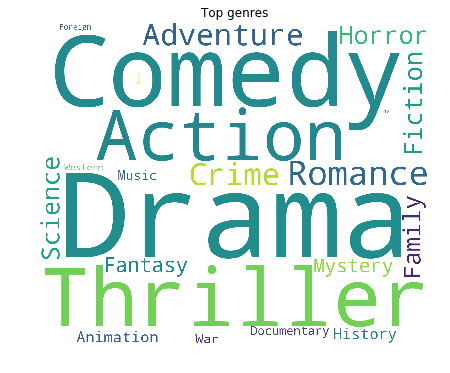

In [73]:
plt.figure(figsize = (10, 6))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

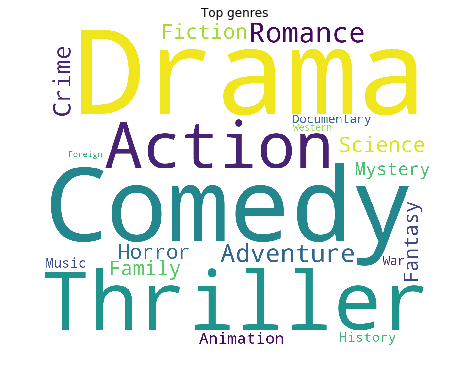

In [74]:
list_of_genres_test=[i for i in test['genres']]
plt.figure(figsize = (10, 6))
text = ' '.join([i for j in list_of_genres_test for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [75]:
# from the Word Cloud it seems both train and test are similar at least wrt genres

In [76]:
# I want to create Binary columns for each genre if We should not have too many genres in data ( sicne only 3000 rows)
#Curse of Dimensionality
#lets check how mnay unique genres are present in data
all_genres=set()
for i in list_of_genres:
    all_genres=all_genres.union(i)

In [77]:
all_genres # there are 20 of them. I will prefer to not USE Binary columns ( Dummies) for these many genres.But lets see
#we can decide later
#instead I will use some kind of encoding. May be Target Encoding ( taking average of the target variable)
#But then which average to take, the Highest or the lowest since, each movie has multiple Genres?

#or Frequency Encoding, so taking the count of number of times these genre appear in the training data. But this has a problem
#A movie can have multiple genre. So what frequncy to take the Highest or the lowest?

#Lets check if the test data also has these genres and not any new

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [78]:
all_genres_test=set()
for i in list_of_genres_test:
    all_genres_test=all_genres_test.union(i)
print(all_genres_test),print(len(all_genres_test))

{'Comedy', 'Horror', 'War', 'Mystery', 'Adventure', 'Music', 'Drama', 'Science Fiction', 'Foreign', 'Action', 'Fantasy', 'Documentary', 'Animation', 'Family', 'Western', 'Crime', 'Thriller', 'History', 'Romance'}
19


(None, None)

In [79]:
[i for i in all_genres_test if i not in all_genres] #no new genres in test

[]

In [80]:
Counter([i for j in list_of_genres for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [81]:
#we will exclude the TV Movie genre as it has only 1 mrecord
most_common_genre=Counter([i for j in list_of_genres for i in j]).most_common(15)

In [82]:
for genre in most_common_genre:
    train['genre_'+genre[0]]=train['genres'].apply(lambda x: 1 if genre[0] in x else 0)
    test['genre_'+genre[0]]=test['genres'].apply(lambda x: 1 if genre[0] in x else 0)
    
#drop genre colum

train.drop('genres',axis=1,inplace=True)
test.drop('genres',axis=1,inplace=True)

### production_companies

In [83]:
for i in train['production_companies'][0:4]:
    print(i)

[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
[{'name': 'Walt Disney Pictures', 'id': 2}]
[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
{}


In [88]:
train['production_cos']=train['production_companies'].apply(lambda x :[i['name']  for i in x] if x!={} else [] )
test['production_cos']=test['production_companies'].apply(lambda x :[i['name']  for i in x] if x!={} else [] )
#take the count
train['Count_production_cos']=train['production_cos'].apply( lambda x: 0 if x==[] else len(x) )
test['Count_production_cos']=test['production_cos'].apply( lambda x: 0 if x==[] else len(x) )

In [95]:
train['Count_production_cos'].value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: Count_production_cos, dtype: int64

In [96]:
#lets create binary columns for th top 10 most occuring production firms
most_common_production_cos=Counter([i for j in train['production_cos'] for i in j]).most_common(10)

In [97]:
for i in most_common_production_cos:
    train['Prod_cos_'+i[0]]=train['production_cos'].apply(lambda x: 1 if i[0] in x else 0)
    test['Prod_cos_'+i[0]]=test['production_cos'].apply(lambda x: 1 if i[0] in x else 0)

In [98]:
train.drop(['production_companies','production_cos'],axis=1,inplace=True)
test.drop(['production_companies','production_cos'],axis=1,inplace=True)

### production_countries

In [99]:
for i in train['production_countries'][18:20]:
    print(i)

[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
[{'iso_3166_1': 'FR', 'name': 'France'}]


In [100]:
train['prod_countries']=train['production_countries'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
test['prod_countries']=test['production_countries'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
train['prod_country_count']=train['production_countries'].apply(lambda x:0 if x=={} else len(x))
test['prod_country_count']=test['production_countries'].apply(lambda x:0 if x=={} else len(x))

In [101]:
most_common_production_countries=Counter([i for j in train['prod_countries'] for i in j]).most_common(10) #take top 10 countries

In [102]:
for i in most_common_production_countries:
    train['prod_country_'+i[0]]=train['prod_countries'].apply(lambda x:1 if i[0] in x else 0)
    test['prod_country_'+i[0]]=test['prod_countries'].apply(lambda x:1 if i[0] in x else 0)

In [104]:
train.drop(['production_countries','prod_countries'],axis=1,inplace=True)
test.drop(['production_countries','prod_countries'],axis=1,inplace=True)

### Spoken languages

In [105]:
train['Language']=train['spoken_languages'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
test['Language']=test['spoken_languages'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
#count
train['Count_Language']=train['Language'].apply(lambda x:len(x) if x!={} else 0)
test['Count_Language']=test['spoken_languages'].apply(lambda x:len(x) if x!={} else 0)

In [106]:
train['Count_Language'].value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: Count_Language, dtype: int64

In [107]:
most_common_languages=Counter([i for j in train['Language'] for i in j]).most_common(9) 
# notice this ('', 47) and ('No Language', 7)

In [108]:
for i in most_common_languages:
    train['Language_'+i[0]]=train['Language'].apply(lambda x: 1 if i[0] in x else 0)
    test['Language_'+i[0]]=test['Language'].apply(lambda x: 1 if i[0] in x else 0)

In [133]:
train.drop(['spoken_languages','Language'],axis=1,inplace=True)
test.drop(['spoken_languages','Language'],axis=1,inplace=True)

### Keywords

In [163]:
for i, e in enumerate(train['Keywords'][:4]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [164]:
train['Keywords']=train['Keywords'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
test['Keywords']=test['Keywords'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
#count
train['Count_Keywords']=train['Keywords'].apply(lambda x:len(x) if x!={} else 0)
test['Count_Keywords']=test['Keywords'].apply(lambda x:len(x) if x!={} else 0)

In [165]:
train['Count_Keywords'].value_counts().head(10) 

5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: Count_Keywords, dtype: int64

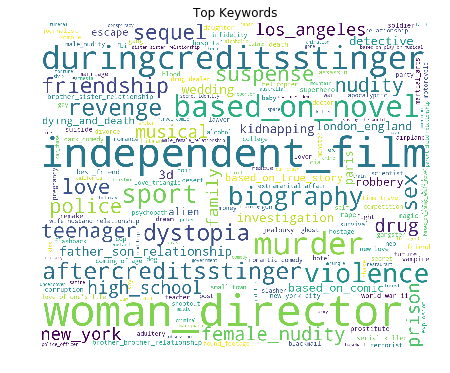

In [171]:
list_of_Keywords_train=[i for i in train['Keywords']]
plt.figure(figsize = (10, 6))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_Keywords_train for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Keywords')
plt.axis("off")
plt.show()

In [172]:
most_common_Keywords=Counter([i for j in train['Keywords'] for i in j]).most_common(10) 

In [174]:
for i in most_common_Keywords:
    train['Keywords_'+i[0]]=train['Keywords'].apply(lambda x:1 if i[0] in x else 0)
    test['Keywords_'+i[0]]=test['Keywords'].apply(lambda x:1 if i[0] in x else 0)

### cast